<a href="https://colab.research.google.com/github/joshuakim314/tf_tutorial/blob/master/basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

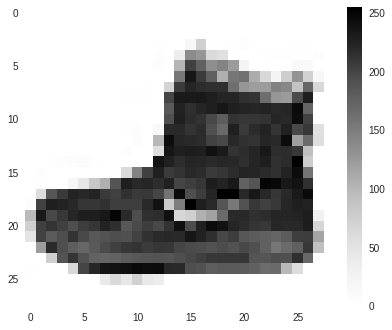

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

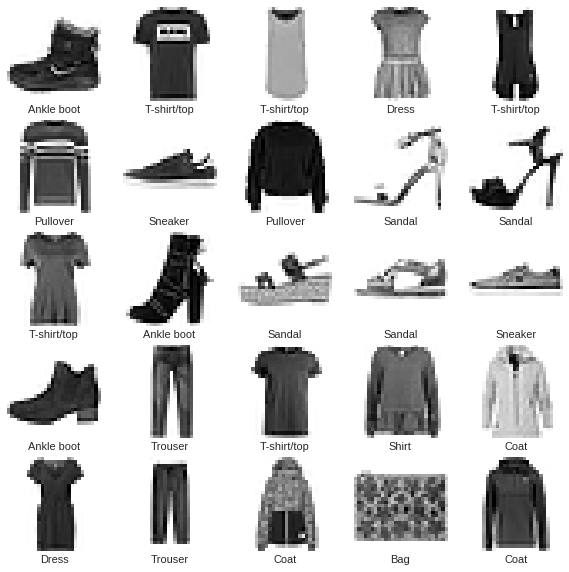

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.5052 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3762 - acc: 0.8672
Epoch 3/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3387 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3146 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2956 - acc: 0.8915


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.3473 - acc: 0.8741
Test accuracy: 0.8741


In [0]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([5.5913756e-06, 1.4862604e-07, 1.3705673e-07, 2.9303640e-09,
       3.5051002e-07, 1.2548184e-02, 5.0762087e-06, 9.2857845e-02,
       8.5833944e-06, 8.9457417e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

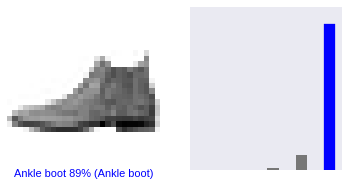

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

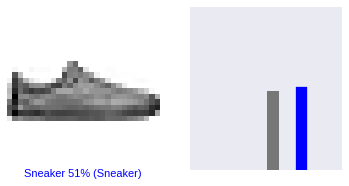

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

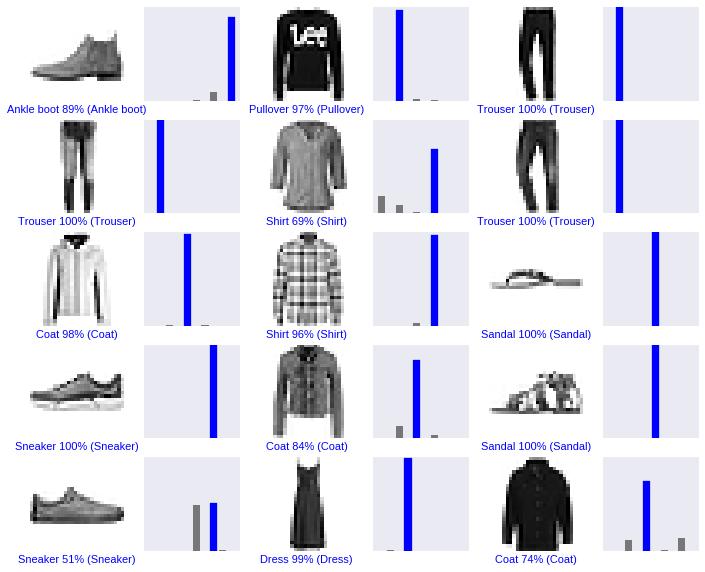

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [29]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.5913856e-06 1.4862630e-07 1.3705736e-07 2.9303691e-09 3.5051099e-07
  1.2548190e-02 5.0762083e-06 9.2857912e-02 8.5833935e-06 8.9457405e-01]]


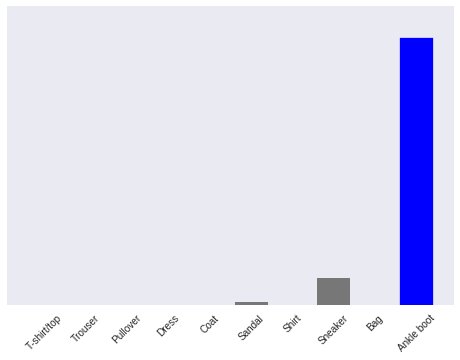

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

9